# Laboratory #03 : Template Matching and HOG

At the end of this laboratory, you would get familiarized with

*   Normalized Correlation
*   Histogram of Oriented Gaussian

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Use will have to mount your drive to access the images.

---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import matplotlib.patches as patches
from skimage import data, feature, filters, io, transform, util, color

# Template Matching

**Exercise #1: Normalized correlation**

*   Load 'einstein.png' image and use 'template.png' to find the location of the template using normalized cross-correlation. *Hint:match_template function is available in the skimage.feature module.*
*   Visualize the original image, template image and normalized cross-correlation image using matplotlib.
*   *Note: Normalize image before applying match_templates.*

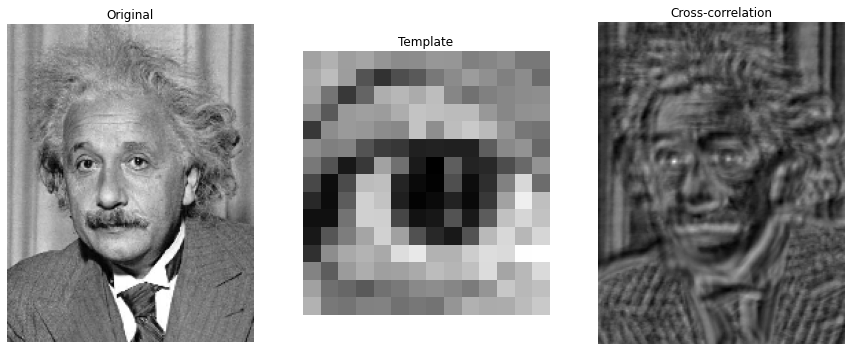

In [2]:
einstein = io.imread('images/einstein.png')
template = io.imread('images/template.png')

einstein = color.rgb2gray(color.rgba2rgb(einstein))
template = color.rgb2gray(color.rgba2rgb(template))
template = (template - template.min())/(template.max() - template.min())

images = {'Original': einstein,
          'Template': template,
          'Cross-correlation': feature.match_template(einstein, template)}

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
for i, (title, image) in enumerate(images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

Output of the match_template function gives the response image with correlation coefficients. To visualize the exact location of the match:
*   Create a function to take the normalized cross-correlation image as input. The function should return the result of the matching as a white point if it matches, black otherwise (Thresholded image).
*   Add the thresholded image to the visualization of the previous output.

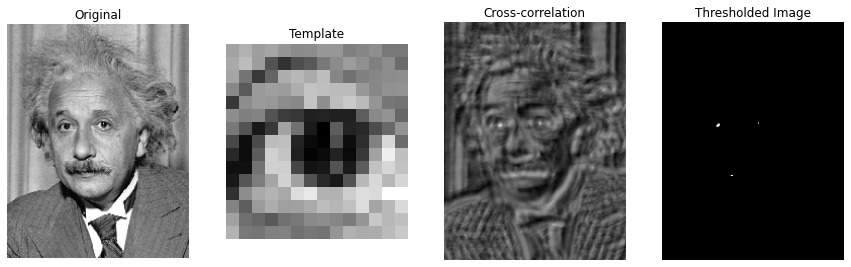

In [3]:
def visualizeLocation(normalized_cross_correlation, threshold=.5):
    return (normalized_cross_correlation > threshold).astype(np.uint8)

einstein = io.imread('images/einstein.png')
template = io.imread('images/template.png')

einstein = color.rgb2gray(color.rgba2rgb(einstein))
template = color.rgb2gray(color.rgba2rgb(template))
template = (template - template.min())/(template.max() - template.min())

images = {'Original': einstein,
          'Template': template,
          'Cross-correlation': feature.match_template(einstein, template),
          'Thresholded Image': visualizeLocation(feature.match_template(einstein, template))}

fig, axs = plt.subplots(1, 4, figsize=(15, 10))
for i, (title, image) in enumerate(images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

**Exercise #2: Effect of contrast**

*   Load 'einstein_br.png'
*   Perform template matching with the 'template.png' image
*   Visualize the original image, template image, normalized cross-correlation image and the thresholded image using matplotlib.

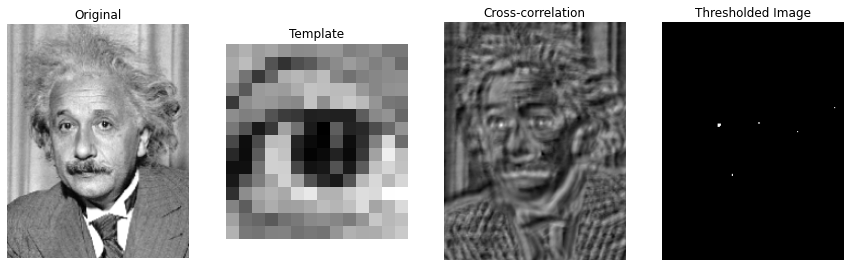

In [4]:
def visualizeLocation(normalized_cross_correlation, threshold=.5):
    return (normalized_cross_correlation > threshold).astype(np.uint8)

einstein = io.imread('images/einstein_br.png')
template = io.imread('images/template.png')

einstein = color.rgb2gray(color.rgba2rgb(einstein))
template = color.rgb2gray(color.rgba2rgb(template))
template = (template - template.min())/(template.max() - template.min())

images = {'Original': einstein,
          'Template': template,
          'Cross-correlation': feature.match_template(einstein, template),
          'Thresholded Image': visualizeLocation(feature.match_template(einstein, template))}

fig, axs = plt.subplots(1, 4, figsize=(15, 10))
for i, (title, image) in enumerate(images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*   Repeat the above experiment with 'einstein_mask.png' image and visualize the results.

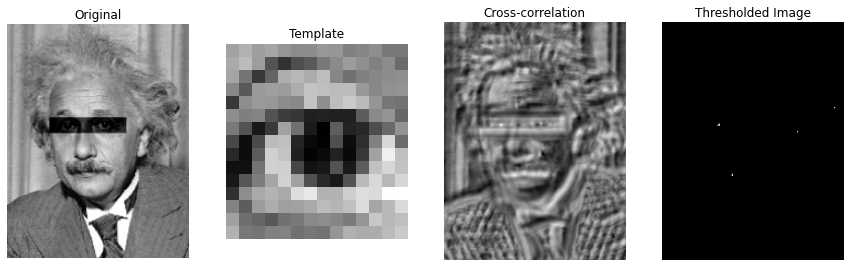

In [5]:
def visualizeLocation(normalized_cross_correlation, threshold=.5):
    return (normalized_cross_correlation > threshold).astype(np.uint8)

einstein = io.imread('images/einstein_mask.png')
template = io.imread('images/template.png')

einstein = color.rgb2gray(color.rgba2rgb(einstein))
template = color.rgb2gray(color.rgba2rgb(template))
template = (template - template.min())/(template.max() - template.min())

images = {'Original': einstein,
          'Template': template,
          'Cross-correlation': feature.match_template(einstein, template),
          'Thresholded Image': visualizeLocation(feature.match_template(einstein, template))}

fig, axs = plt.subplots(1, 4, figsize=(15, 10))
for i, (title, image) in enumerate(images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*   Do you find any differences in results with respect to contrast changes? 
*   If yes, why do you find those differences? If no, why there is no difference?

**Solution**

We can appreciate how normalized cross-correlation is not extremely sensible to little contrast changes, but it is to bigger ones. The results obtained for `einstein_mask.png` after applying a huge contrast change in the position of the eyes (exactly where some candidates for the template matching could be found), the correlation is not big enough to indicate the likelihood of all the possible candidate for the template matching but it is still able to find some (the number of points of the correlated image that are above the threshold greatly diminished but it still exists).

This is possible as the normalized cross-correlation template matching can more or less handle illumination changes, contrast changes or even translation.

However, when the contrast is partially changed in a local area, the algorithm is not capable of ignoring the effect of the contrast change.

*   What are the minimal distance pixels in the correlation images of original image and masked image?


In [6]:
einstein = io.imread('images/einstein.png')
template = io.imread('images/template.png')

einstein = color.rgb2gray(color.rgba2rgb(einstein))
template = color.rgb2gray(color.rgba2rgb(template))
template = (template - template.min())/(template.max() - template.min())

correlatedImage = feature.match_template(einstein, template)

einstein = io.imread('images/einstein_mask.png')
einstein = color.rgb2gray(color.rgba2rgb(einstein))
correlatedMaskImage = feature.match_template(einstein, template)

print("Minimal Distance pixels from the original image")
print(1 - np.max(correlatedImage))
print("\n")
print("Minimal Distance pixels from the masked image")
print(1 - np.max(correlatedMaskImage))

Minimal Distance pixels from the original image
-1.7763568394002505e-15


Minimal Distance pixels from the masked image
0.37016212259174885


In the case of the original Image, the distance is almost 0, however, because the masked image is darker, the distance value is bigger.

*   Using the thresholded image, obtain the position of the left eye and also calculate the position of the right eye (*Hint:The right eye would be in the same row as that of the left eye*).

Left eye:  (51, 94)


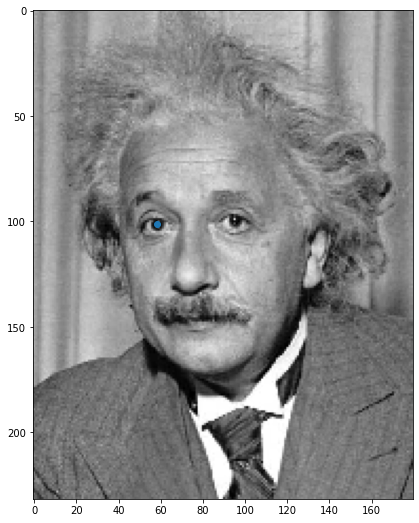

In [7]:
einstein = io.imread('images/einstein.png')
template = io.imread('images/template.png')

einstein = color.rgb2gray(color.rgba2rgb(einstein))
template = color.rgb2gray(color.rgba2rgb(template))
template = (template - template.min())/(template.max() - template.min())

correlatedImage = feature.match_template(einstein, template)

ij = np.unravel_index(np.argmax(correlatedImage), correlatedImage.shape)
leftEyePosition = ij[::-1]
leftEyePositionMarker = (leftEyePosition[0] + template.shape[0]//2,
                         leftEyePosition[1] + template.shape[1]//2)

print("Left eye: ", leftEyePosition)

plt.figure(figsize=(15,9))
plt.imshow(einstein, cmap='gray')
plt.scatter(*leftEyePositionMarker)
plt.show()

Right eye:  [95, 94]


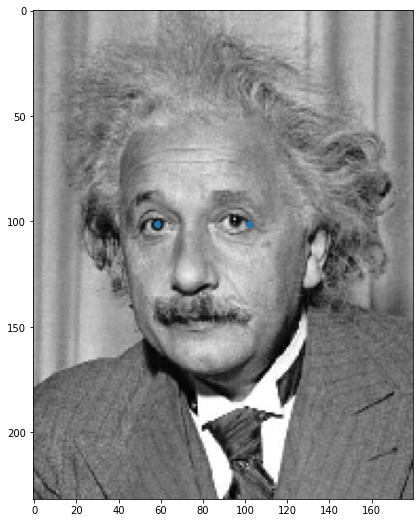

In [8]:
maxCorrelation = np.max(correlatedImage)

# We try to find candidates in the same row that have a correlation of < 0.5 (excluding the left eye)
rightEyeCandidates = np.where(correlatedImage[leftEyePosition[1]] <= maxCorrelation - 0.5)[0]

# Makes an estimation that the eye will be found between pixels 85 and 105
rightEyeCandidates = rightEyeCandidates[(rightEyeCandidates > 85) & (rightEyeCandidates < 105)]

# Get the middle point of the final candidates
rightEyePosition = [np.mean(rightEyeCandidates, dtype=np.uint16), leftEyePosition[1]]
rightEyePositionMarker = (rightEyePosition[0] + template.shape[0]//2,
                          rightEyePosition[1] + template.shape[1]//2)
print("Right eye: ", rightEyePosition)

plt.figure(figsize=(15,9))
plt.imshow(einstein, cmap='gray')
plt.scatter([leftEyePositionMarker[0], 
             rightEyePositionMarker[0]], 
            [leftEyePositionMarker[1], 
             rightEyePositionMarker[1]])
plt.show()

*   What are the distances between the template and the image around the eyes of the image in the original image and the masked image?

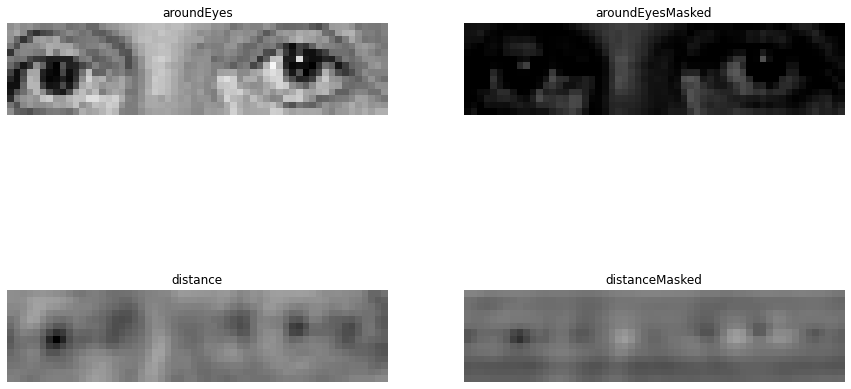

In [9]:
einstein = io.imread('images/einstein.png')
template = io.imread('images/template.png')
einsteinMask = io.imread('images/einstein_mask.png')

einstein = color.rgb2gray(color.rgba2rgb(einstein))
template = color.rgb2gray(color.rgba2rgb(template))
einsteinMask = color.rgb2gray(color.rgba2rgb(einsteinMask))

# Row boundary as half the height of the template image
middle_template_row = template.shape[0]//2
# Column boundary as half the width of the template image
middle_template_col = template.shape[1]//2

lowerRow = leftEyePositionMarker[1] - middle_template_row
upperRow = leftEyePositionMarker[1] + middle_template_row
lowerCol = leftEyePositionMarker[0] - middle_template_col
upperCol = rightEyePositionMarker[0] + middle_template_col

# Einstein image around the eyes (Exact position of the eyes +/- boundaries)
aroundEyes = einstein[lowerRow:upperRow, lowerCol:upperCol]
# Einstein Masked image around the eyes (Exact position of the eyes +/- boundaries)
aroundEyesMasked = einsteinMask[lowerRow:upperRow, lowerCol:upperCol]

correlationImage = feature.match_template(einstein, template, pad_input=True)
correlationImageMasked = feature.match_template(einsteinMask, template, pad_input=True)

# Einstein correlation image around the eyes (Exact position of the eyes +/- boundaries)
correlationImage = correlationImage[lowerRow:upperRow, lowerCol:upperCol]
# Einstein Masked correlation image around the eyes (Exact position of the eyes +/- boundaries)
correlationImageMasked = correlationImageMasked[lowerRow:upperRow, lowerCol:upperCol]

def distance(inp):
    return 1 - ((inp + 1)/2)

images = {
    "aroundEyes": aroundEyes,
    "aroundEyesMasked": aroundEyesMasked,
    "distance": distance(correlationImage),
    "distanceMasked": distance(correlationImageMasked)
}

def plotImageMatrix(images:dict, grid=(2, 2), **kwargs):
    f, ax = plt.subplots(grid[0], grid[1], figsize=(15, 9))
    for imageIdx, (title, image) in enumerate(images.items()):
        ax[imageIdx//grid[0]][imageIdx%grid[1]].set_title(title)
        ax[imageIdx//grid[0]][imageIdx%grid[1]].imshow(image, **kwargs)
        ax[imageIdx//grid[0]][imageIdx%grid[1]].axis('off')
    plt.plot()
    
plotImageMatrix(images, cmap='gray', vmin=0, vmax=1)

The distance around the eyes is very small as the template is extracted from the image and it will give a very high correlation (which we use as similarity metric and `similarity = 1-distance`)

*   What happens if you change the contrast of the template image?
*   Use 'template_br.png' instead of 'template.png' and repeat the experiment with 'einstein.png'
*   Visualize the results.

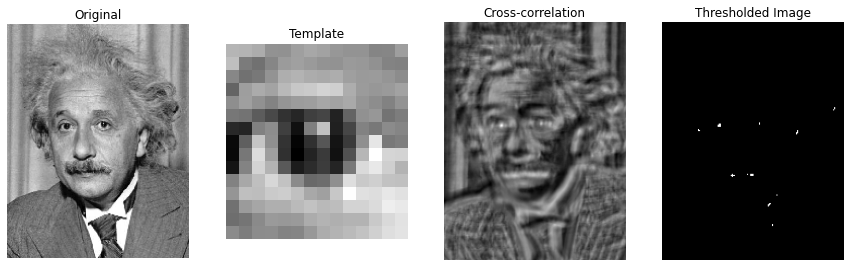

In [10]:
def visualizeLocation(normalized_cross_correlation, threshold=.5):
    return (normalized_cross_correlation > threshold).astype(np.uint8)

einstein = io.imread('images/einstein.png')
template = io.imread('images/template_br.png')

einstein = color.rgb2gray(color.rgba2rgb(einstein))
template = color.rgb2gray(color.rgba2rgb(template))

images = {'Original': einstein,
          'Template': template,
          'Cross-correlation': feature.match_template(einstein, template),
          'Thresholded Image': visualizeLocation(feature.match_template(einstein, template))}

fig, axs = plt.subplots(1, 4, figsize=(15, 10))
for i, (title, image) in enumerate(images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

**Exercise #3: Effect of rotation**

*   Load 'einstein.png' image and 'template.png' image.
*   Rotate the template by 10&deg;, 15&deg;, 20&deg; and perform template matching.
*   Visualize the original image, template image and the thresholded normalized cross-correlation image for all the different templates.
*   *Hint: rotate function is available in skimage.transform module*

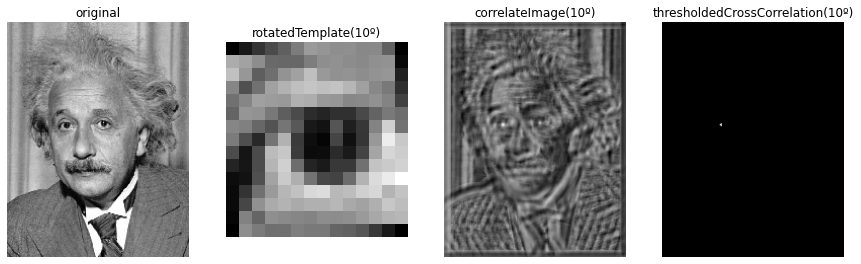

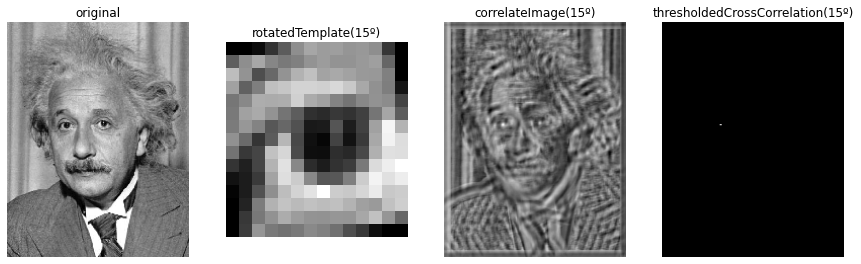

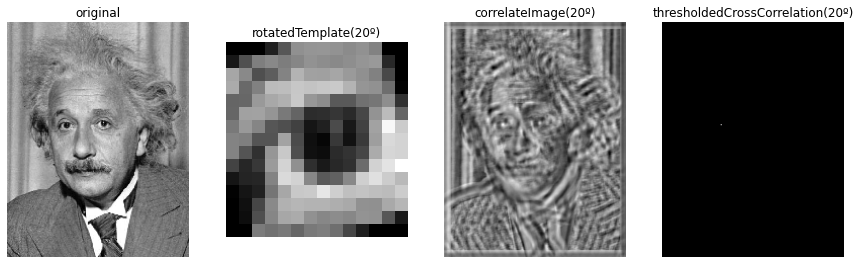

In [11]:
def visualizeLocation(normalized_cross_correlation, threshold=.5):
    return (normalized_cross_correlation > threshold).astype(np.uint8)

def plotImages(images):
    f, ax = plt.subplots(1, len(images), figsize=(15, 9))
    for imageIdx, (title, image) in enumerate(images.items()):
        ax[imageIdx].set_title(title)
        ax[imageIdx].imshow(image, cmap='gray')
        ax[imageIdx].axis('off')
    plt.plot()

einstein = io.imread('images/einstein.png')
template = io.imread('images/template.png')

einstein = color.rgb2gray(color.rgba2rgb(einstein))
template = color.rgb2gray(color.rgba2rgb(template))

for angle in (10, 15, 20):
    rotatedPatternImage = transform.rotate(template, angle)
    correlateRotatedImage = feature.match_template(einstein, rotatedPatternImage, pad_input=True)
    images = {
        "original": einstein,
        f"rotatedTemplate({angle}º)": rotatedPatternImage,
        f"correlateImage({angle}º)": correlateRotatedImage,
        f"thresholdedCrossCorrelation({angle}º)": visualizeLocation(correlateRotatedImage)
    }
    plotImages(images)

*   What do you infer with respect to rotation?

**Solution**

Basically, nomalized cross-correlation is sensible to rotation, so the higher the rotation degree, the worse correlation value obtained.

# Histogram of Oriented Gaussians

**Exercise #1: HOG Image Visualization**

*   Load 'astronaut' image from the data module.
*   Apply hog over the image with default parameters. *Hint: hog function is available in skimage.feature module.*
*   Visualize the original image and the hog_image using matplotlib


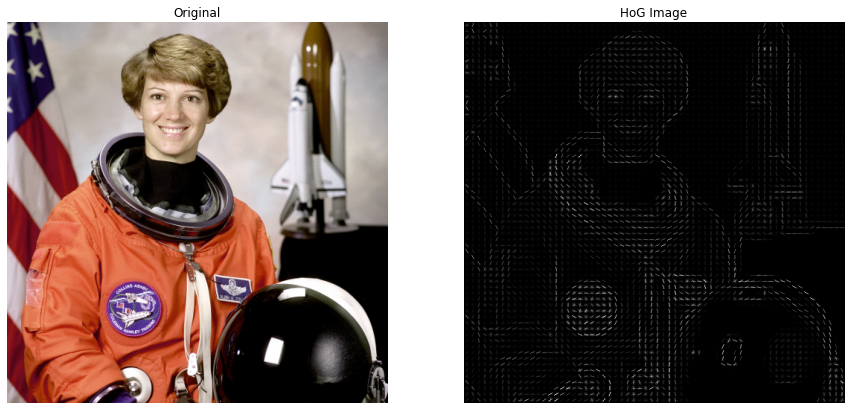

In [12]:
astronaut = data.astronaut()
descriptors, hog_image = feature.hog(astronaut, visualize=True, multichannel=True)

images = {'Original': astronaut,
          'HoG Image': hog_image}

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
for i, (title, image) in enumerate(images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*   HoG returns feature descriptors and hog image. What do you infer from each term of the feature descriptors in the output of hog function?

**Solution**

Each term of the feature descriptors represents an orientation of each cell of each overlapping block. So we could group N orientations which would give us the gradient for the P pixels (pixels per cell) in the image, which is what is portayed in the hog image.

*   Change the value of orientation (try atleast 3 different values) and compare the hog_image using matplotlib subplot.

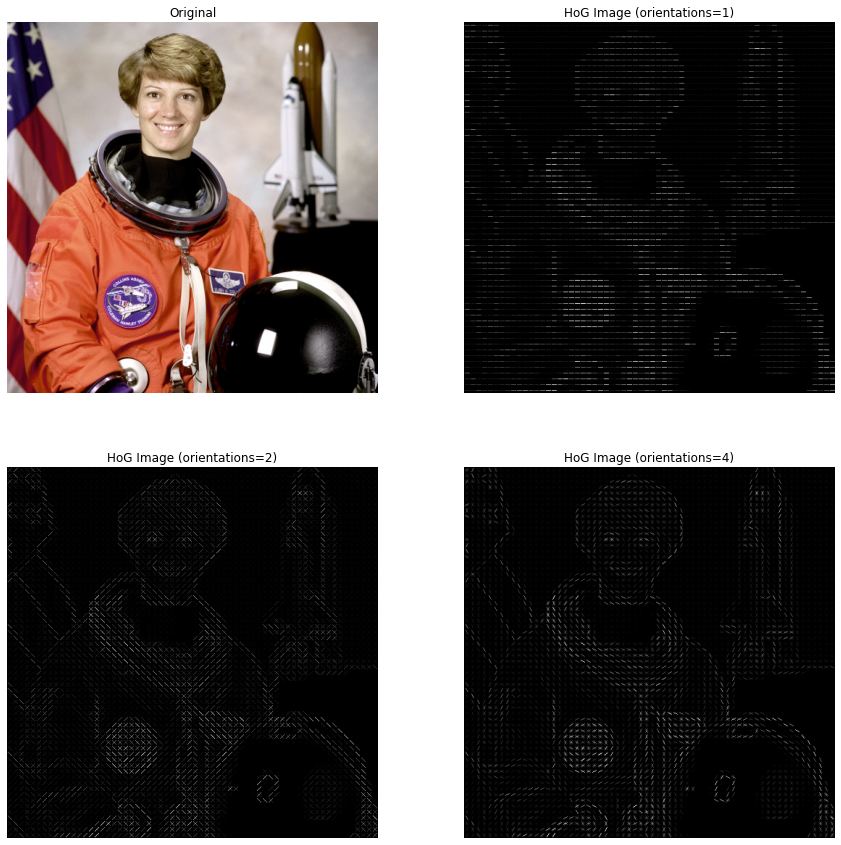

In [13]:
astronaut = data.astronaut()

descriptors, hog_image_1 = feature.hog(astronaut, orientations=1, visualize=True, multichannel=True)
descriptors, hog_image_2 = feature.hog(astronaut, orientations=2, visualize=True, multichannel=True)
descriptors, hog_image_4 = feature.hog(astronaut, orientations=4, visualize=True, multichannel=True)

images = {'Original': astronaut,
          'HoG Image (orientations=1)': hog_image_1,
          'HoG Image (orientations=2)': hog_image_2,
          'HoG Image (orientations=4)': hog_image_4}

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
for i, (title, image) in enumerate(images.items()):
    axs[i // 2][i % 2].imshow(image, cmap='gray')
    axs[i // 2][i % 2].set_title(title)
    axs[i // 2][i % 2].axis('off')
plt.show()

*   What do you infer from the parameters orientation and pixels_per_cell?


**Solution**

The orientation parameter defines the number of different orientations (how many bins) from the gradient that can be used to compute the HoG, while the pixels per cell express the number of pixels to collect per each cell to compute the HoG. A larger amount of pixels per cell would provide a less accurate HoG as we gather more pixels to compute the gradient.

**Exercise #2: Pedestrian detection**

*   Read the template ('person_template.png') and obtain its HOG descriptor (try different values for the parameters and get the optimal values)
*   Visualize the original image and the hog_image using matplotlib. Show different parameter selection steps also.

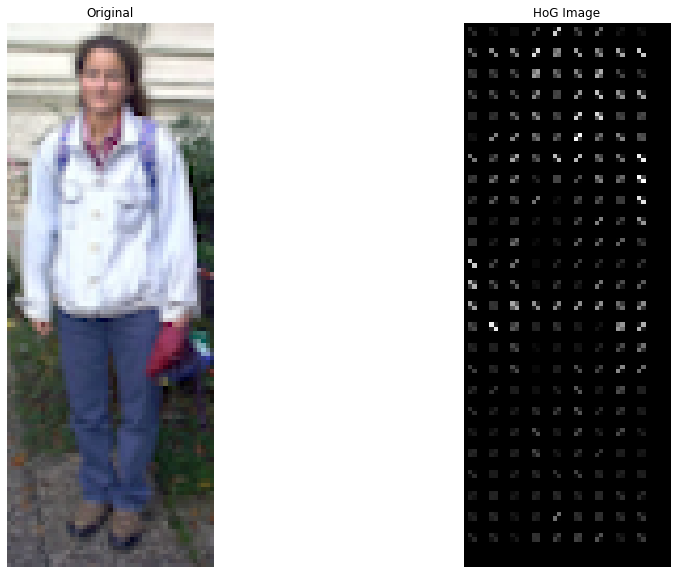

In [14]:
person = io.imread('images/person_template.bmp')
person = color.rgba2rgb(person)

hogParams = {
    "orientations": 8,
    "pixels_per_cell": (5, 5),
    "cells_per_block": (2, 2),
    "visualize": True,
    "multichannel": True
}

descriptors, hog_image = feature.hog(person, **hogParams)

images = {'Original': person,
          'HoG Image': hog_image}

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
for i, (title, image) in enumerate(images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()


*   Read the folder 'pedestrians' from the images folder.
*   For each image, apply sliding window, to get the hog descriptors (Use a step size of 5 pixels for the sliding window)
*   Compare the hog descriptors with the hog descriptor of the person_template
*   Use euclidean distance and dot product to compare the descriptors
*   Visualize the location of the image that is most similar to the person_template using both the metrics in a n x 5 subplot. *Note: For each image, show the original image (1), best match region using a bounding box in the image, best match region using a bounding box in the hog_image for euclidean distance (2,3), for dot product (4,5)*


In [15]:
STRIDE = 5

def strided2D(image, template, hogParams={}):
    te_rows, te_cols = template.shape[:2]
    im_rows, im_cols = image.shape[:2]
    iterRow, iterCol = im_rows - te_rows, im_cols - te_cols
    featureGSVector = feature.hog(template, **hogParams)
    euclideanMatrix = np.full(image.shape[:2], np.inf)
    dotMatrix = np.zeros(image.shape[:2])
    for i in range(0, iterRow, STRIDE):
        for j in range(0, iterCol, STRIDE):
            imageChunk = image[i:i+te_rows, j:j+te_cols]
            featureVector = feature.hog(imageChunk, **hogParams)
            euclideanMatrix[i, j] = np.linalg.norm(featureVector - featureGSVector)
            dotMatrix[i, j] = featureVector@featureGSVector
    euclideanCoordinates = np.unravel_index(np.argmin(euclideanMatrix), euclideanMatrix.shape)[::-1]
    dotCoordinates = np.unravel_index(np.argmax(dotMatrix), dotMatrix.shape)[::-1]
    return euclideanCoordinates, dotCoordinates

In [ ]:
personTemplate = io.imread('images/person_template.bmp')
personTemplate = color.rgba2rgb(personTemplate)

hogParams = {
    "orientations": 8,
    "pixels_per_cell": (5, 5),
    "cells_per_block": (2, 2)
}

images = io.imread_collection("images/pedestrians/person_*")
filePaths = sorted(list(Path("images/pedestrians/").glob('*')))

f, ax = plt.subplots(len(images), 5, figsize=(10,55))
for imageIdx, personImage in enumerate(images):
    _, hogImage = feature.hog(personImage, **hogParams, visualize=True)

    minCoordenatesEuclidean, minCoordenatesDot = strided2D(personImage, personTemplate, hogParams=hogParams)

    ax[imageIdx][0].imshow(personImage)
    ax[imageIdx][0].set_title(filePaths[imageIdx].stem)
    ax[imageIdx][0].axis('off')

    patchEuc = patches.Rectangle(minCoordenatesEuclidean, personTemplate.shape[1], personTemplate.shape[0], edgecolor='r', facecolor='none')
    ax[imageIdx][1].imshow(personImage)
    ax[imageIdx][1].set_title('Euclidean/original')
    ax[imageIdx][1].add_patch(patchEuc)
    ax[imageIdx][1].axis('off')

    patchEuc = patches.Rectangle(minCoordenatesEuclidean, personTemplate.shape[1], personTemplate.shape[0], edgecolor='r', facecolor='none')
    ax[imageIdx][2].imshow(hogImage, cmap='gray')
    ax[imageIdx][2].set_title('Euclidean/hog')
    ax[imageIdx][2].add_patch(patchEuc)
    ax[imageIdx][2].axis('off')    

    patchDot = patches.Rectangle(minCoordenatesDot, personTemplate.shape[1], personTemplate.shape[0], edgecolor='r', facecolor='none')
    ax[imageIdx][3].imshow(personImage)
    ax[imageIdx][3].set_title('Dot/original')
    ax[imageIdx][3].add_patch(patchDot)
    ax[imageIdx][3].axis('off')

    patchDot = patches.Rectangle(minCoordenatesDot, personTemplate.shape[1], personTemplate.shape[0], edgecolor='r', facecolor='none')
    ax[imageIdx][4].imshow(hogImage, cmap='gray')
    ax[imageIdx][4].set_title('Dot/hog')
    ax[imageIdx][4].add_patch(patchDot)
    ax[imageIdx][4].axis('off')
plt.show()

*   Count the failures and discuss the possible reason for failure for each image.

**Solution**

Euclidean distance: 5 failures (person_016, person_018, person_020, person_024, person_027)

Dot distance: 5 failures (person_016, person_018, person_020, person_024, person_027)

In picture person_016 the shape of the person is not similar to the ones in the template, also it is quite closer to the camera when taken the picture.

In picture person_018 person quite closer to the camera than the template and again, the shape varies a lot from the template person.

In picture person_020 the person is not in the same position, specially the arm and that will affect the hog calculation. Also the background having sharp edges might confuse the metric.

In picture person_024, the background of the image shows a bench, which generates gradient vectors with horizontal orientation that can be confused with the waist gradient vectors of the template's person.

In picture person_027 the posture of the person makes it quite difficult to detect as it is sideways.

*   What is the failure rate for dot product and what is the failure rate for euclidean distance?
*   Are there differenes? If yes, what are the possible reasons for difference between these two methods? 

**Solution**

The failiure rate is a 33.33% for both distance metrics.

No differences are noticeable.

*   Provide a detailed comparison between template matching and HOG. What are the advantages of HOG over template matching algorithm.

**Solution**

On the one hand, template matching compares a chunk of an image with a template at a pixel level, computing the correlation metric with the intensity values of each pixel. 

On the other hand, HoG is a feature extractor based on the direction of the gradient vectors on the image chunk (sliding window). This makes it more robust to global intensity changes, noise and scale.


---

## **End of P3: Template Matching and HOG**
Deadline for P3 submission in CampusVirtual is: **Thursday, the 22nd of October, 2020**
